# K-Means Clustering

### Problem Statement:
Run a K Means clustering Algorithm to find insights having business application.

### Theory 

1. K-means is a centroid-based clustering algorithm, where we calculate the distance between each data point and a centroid to assign it to a cluster. The goal is to identify the K number of groups in the dataset. 

2. It is an iterative process of assigning each data point to the groups and slowly data points get clustered based on similar features. The objective is to minimize the sum of distances between the data points and the cluster centroid, to identify the correct group each data point should belong to. 

3. Here, we divide a data space into K clusters and assign a mean value to each. The data points are placed in the clusters closest to the mean value of that cluster. There are several distance metrics available that can be used to calculate the distance. 

### Implementation

The steps to be followed for the implementation are given below:

1. Data Pre-processing
2. Finding the optimal number of clusters using the elbow method
3. Training the K-means algorithm on the training dataset
4. Visualizing the clusters



#### Step-1: Data pre-processing Step

1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In the above code, the numpy we have imported for the performing mathematics calculation, matplotlib is for plotting the graph, and pandas are for managing the dataset.

Importing the Dataset:
Next, we will import the dataset that we need to use. So here, we are using the Mall_Customer_data.csv dataset. It can be imported using the below code:

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv")

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Extracting Independent Variables

Here we don't need any dependent variable for data pre-processing step as it is a clustering problem, and we have no idea about what to determine. So we will just add a line of code for the matrix of features.

In [4]:
#assigning only last 2 columns to x 
x = df.iloc[:, [3,4]]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


#### Step-2: Finding the optimal number of clusters using the elbow method

In the second step, we will try to find the optimal number of clusters for our clustering problem.

Here we have used the KMeans class of sklearn. cluster library to form the clusters.

In [5]:
from sklearn.cluster import KMeans

Next, we have created the wcss_list variable to initialize an empty list, which is used to contain the value of wcss computed for different values of k ranging from 1 to 10.

After that, we have initialized the for loop for the iteration on a different value of k ranging from 1 to 10; since for loop in Python, exclude the outbound limit, so it is taken as 11 to include 10th value.

In [6]:
#initializing wcss
wcss = [] 

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\Users\UMAP\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\UMAP\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\UMAP\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\UMAP\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default valu

In this part of the code we have fitted the model on the matrix of features and then plotted the graph between the number of clusters and WCSS.

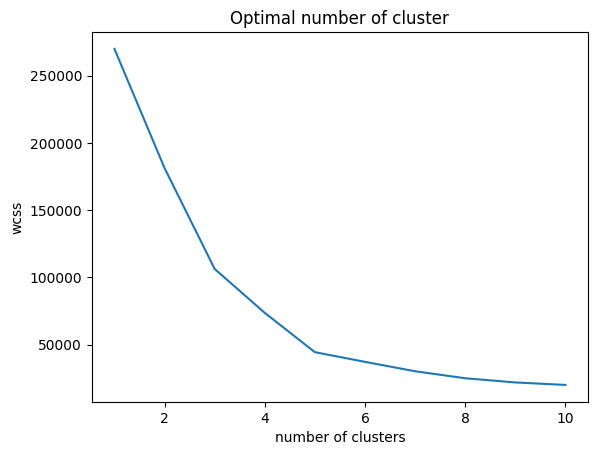

In [7]:
#plotting graph
plt.plot(range(1,11), wcss)
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.title('Optimal number of cluster')
plt.show()

From the above plot, we can see the elbow point is at 5. So the number of clusters here will be 5.

#### Step- 3: Training the K-means algorithm on the training dataset

As we have got the number of clusters, so we can now train the model on the dataset.

To train the model, we will use the same two lines of code as we have used in the above section, but here instead of using i, we will use 5, as we know there are 5 clusters that need to be formed.

In [8]:
kmeans = KMeans(n_clusters=5, init = "k-means++", random_state=42)
y_kmeans = kmeans.fit_predict(x)

C:\Users\UMAP\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The first line is the same as above for creating the object of KMeans class.

In the second line of code, we have created the dependent variable y_kmeans to train the model.

In [9]:
y_kmeans

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

#### Step-4: Visualizing the Clusters

The last step is to visualize the clusters. As we have 5 clusters for our model, so we will visualize each cluster one by one.

To visualize the clusters will use scatter plot using mtp.scatter() function of matplotlib.

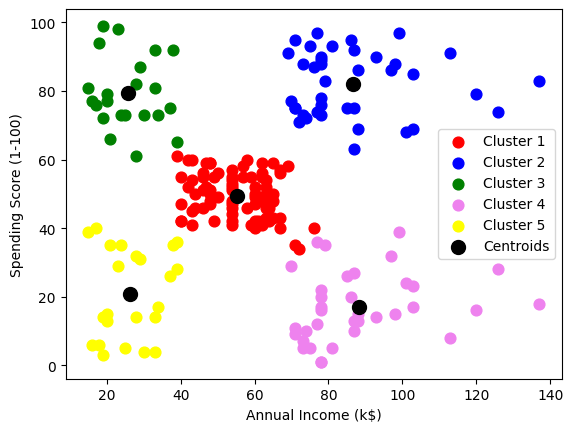

In [10]:
# Assuming x is a Pandas DataFrame
x_array = x.to_numpy()  # Convert to NumPy array

plt.scatter(x_array[y_kmeans==0, 0], x_array[y_kmeans==0, 1], s=60, c='red', label='Cluster 1')
plt.scatter(x_array[y_kmeans==1, 0], x_array[y_kmeans==1, 1], s=60, c='blue', label='Cluster 2')
plt.scatter(x_array[y_kmeans==2, 0], x_array[y_kmeans==2, 1], s=60, c='green', label='Cluster 3')
plt.scatter(x_array[y_kmeans==3, 0], x_array[y_kmeans==3, 1], s=60, c='violet', label='Cluster 4')
plt.scatter(x_array[y_kmeans==4, 0], x_array[y_kmeans==4, 1], s=60, c='yellow', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids')
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()
plt.show()


### In conclusion, 
the K-means clustering algorithm was implemented to cluster customers based on their annual income and spending score. The optimal number of clusters was determined to be 5 using the elbow method. The algorithm was trained on the dataset, and the clusters were visualized using a scatter plot.

The clusters were analyzed as follows:

- Cluster 1: Customers with average income and average spending, categorized as "average."
- Cluster 2: Customers with high income and high spending, categorized as "target" and considered highly profitable for the mall owner.
- Cluster 3: Customers with low income but very high spending, categorized as "careless."
- Cluster 4: Customers with high income but low spending, categorized as "careful."
- Cluster 5: Customers with low income and low spending, categorized as "sensible."

These findings provide valuable insights into different customer segments, allowing the mall owner to tailor their marketing strategies and services to better cater to each cluster's characteristics.